<a href="https://colab.research.google.com/github/CamiloVga/Curso-IA-Aplicada/blob/main/Monitoria_Parcial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PARCIAL 1**


### Instalación de Bibliotecas y Carga del Dataset

En esta sección se realiza la instalación de todas las bibliotecas necesarias para trabajar, al igual que el dataset desde Kaggle.

In [2]:
!pip install kaggle ydata_profiling -q

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 392.1/392.1 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 24.4 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None) # Quitar el límite de columnas a mostrar en un DataFrame
from google.colab import files
from numpy import sqrt
from ydata_profiling import ProfileReport

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, FunctionTransformer, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, classification_report, ConfusionMatrixDisplay

SEED = 2025

In [4]:
!kaggle datasets download mastmustu/income

Dataset URL: https://www.kaggle.com/datasets/mastmustu/income
License(s): CC0-1.0
  0% 0.00/590k [00:00<?, ?B/s]
100% 590k/590k [00:00<00:00, 112MB/s]


In [5]:
ROOT_DIR = '/content'
DATASET_NAME = 'income'

%cd {ROOT_DIR}
!unzip -o {DATASET_NAME}.zip -d {ROOT_DIR}/{DATASET_NAME}

/content
Archive:  income.zip
  inflating: /content/income/test.csv  
  inflating: /content/income/train.csv  


### 1. **Explicación del dataset**

Este estudio se centrará en factores demográficos, económicos y laborales que influyen en los ingresos individuales. Dado que las observaciones de este conjunto de datos incluyen una muestra diversa de individuos, será más fácil identificar los factores predictivos clave que contribuyen a diferentes niveles salariales. Esto ayudará a desarrollar estrategias para mejorar la inclusión económica y facilitar la toma de decisiones en políticas laborales y educativas.

# Análisis del Dataset

## 1. **Explicación del dataset**
Este dataset contiene información socioeconómica y laboral de individuos. Se incluyen variables como edad, educación, estado civil, ocupación, ingresos y otras características relevantes para evaluar factores relacionados con el nivel de ingresos y las condiciones de empleo.

El objetivo del análisis es identificar patrones y relaciones entre estas variables, especialmente aquellas que influyen en la probabilidad de que un individuo tenga ingresos superiores a $50,000 al año.

## 2. **Descripción de las Variables**

| **Columna**              | **Descripción**                                                               |
|--------------------------|-------------------------------------------------------------------------------|
| **age**                  | Edad del individuo.                                                           |
| **workclass**            | Tipo de empleo (privado, gubernamental, etc.).                                |
| **fnlwgt**               | Ponderación de la muestra para la representación poblacional.                  |
| **education**            | Nivel educativo alcanzado.                                                   |
| **educational-num**      | Años de educación completados.                                               |
| **marital-status**       | Estado civil del individuo.                                                   |
| **occupation**           | Ocupación principal del individuo.                                           |
| **relationship**         | Relación familiar con el cabeza de familia.                                  |
| **race**                 | Grupo racial al que pertenece el individuo.                                  |
| **gender**               | Género del individuo.                                                        |
| **capital-gain**         | Ingresos de capital obtenidos.                                               |
| **capital-loss**         | Pérdidas de capital sufridas.                                                |
| **hours-per-week**       | Horas trabajadas por semana.                                                 |
| **native-country**       | País de origen del individuo.                                               |
| **income_>50K**         | Variable binaria que indica si el individuo tiene ingresos mayores a $50,000. |

## 3. **Análisis Exploratorio**

- **Distribución de Edad**: Se puede analizar la distribución de la edad de los individuos en el dataset y su relación con los ingresos.
- **Nivel Educativo**: Relación entre el nivel educativo y la probabilidad de obtener ingresos superiores a $50,000.
- **Horas Trabajadas**: Evaluar cuánto influye la cantidad de horas trabajadas por semana en los ingresos.
- **Ocupación y Sector Laboral**: Determinar qué ocupaciones y sectores laborales están más asociados a ingresos altos.
- **Diferencias por Género y Grupo Racial**: Identificar posibles disparidades en ingresos según género y raza.

## 4. **Posibles Modelos de Análisis**

Dado que la variable **income_>50K** es binaria, se pueden emplear modelos como:
- **Regresión Logística** para predecir la probabilidad de que un individuo tenga ingresos altos.
- **Árboles de Decisión** y **Random Forest** para identificar las variables más influyentes.
- **Análisis de Componentes Principales (PCA)** para reducir dimensionalidad y visualizar patrones en los datos.

Este análisis proporcionará información clave sobre los factores que impactan los ingresos de los individuos y ayudará a formular estrategias basadas en datos.



In [6]:
df = pd.read_csv(f'{ROOT_DIR}/{DATASET_NAME}/train.csv')

# Remover espacios de inicio y final de los títulos de las columnas.
df.columns = df.columns.str.strip()
df

age  workclass  fnlwgt     education  educational-num  \
0       67    Private  366425     Doctorate               16   
1       17    Private  244602          12th                8   
2       31    Private  174201     Bachelors               13   
3       58  State-gov  110199       7th-8th                4   
4       25  State-gov  149248  Some-college               10   
...    ...        ...     ...           ...              ...   
43952   52    Private   68982     Bachelors               13   
43953   19    Private  116562       HS-grad                9   
43954   30    Private  197947  Some-college               10   
43955   46    Private   97883     Bachelors               13   
43956   30    Private  375827       HS-grad                9   

           marital-status         occupation    relationship   race  gender  \
0                Divorced    Exec-managerial   Not-in-family  White    Male   
1           Never-married      Other-service       Own-child  White    Male   
2      Married-civ-spouse    Exec-managerial         Husband  White    Male   
3      Married-civ-spouse   Transport-moving         Husband  White    Male   
4           Never-married      Other-service   Not-in-family  Black    Male   
...                   ...                ...             ...    ...     ...   
43952  Married-civ-spouse    Exec-managerial         Husband  White    Male   
43953       Never-married      Other-service       Own-child  White  Female   
43954            Divorced              Sales   Not-in-family  White    Male   
43955       Never-married              Sales   Not-in-family  White  Female   
43956       Never-married  Handlers-cleaners  Other-relative  White    Male   

       capital-gain  capital-loss  hours-per-week native-country  income_>50K  
0             99999             0              60  United-States            1  
1                 0             0              15  United-States            0  
2                 0             0              40  United-States            1  
3                 0             0              40  United-States            0  
4                 0             0              40  United-States            0  
...             ...           ...             ...            ...          ...  
43952             0             0              50  United-States            1  
43953             0             0              40  United-States            0  
43954             0             0              58  United-States            0  
43955             0             0              35  United-States            0  
43956             0             0              40  United-States            0  

[43957 rows x 15 columns]

### 2. **Análisis descriptivo**

In [7]:
# División de los datos en Train y Test de manera aleatoria
df_train, df_test = train_test_split(df, test_size=0.2 , random_state=SEED)
display(df_train.head())
display(df_test.head())

age     workclass  fnlwgt     education  educational-num  \
6555    29       Private   46609          10th                6   
41256   19       Private  118352  Some-college               10   
27279   70           NaN  133248       HS-grad                9   
21788   51  Self-emp-inc  335902  Some-college               10   
39263   21     State-gov   39236  Some-college               10   

           marital-status      occupation   relationship   race  gender  \
6555        Never-married    Craft-repair  Not-in-family  Black    Male   
41256       Never-married   Other-service      Own-child  White  Female   
27279  Married-civ-spouse             NaN        Husband  White    Male   
21788  Married-civ-spouse    Craft-repair        Husband  White    Male   
39263       Never-married  Prof-specialty  Not-in-family  White  Female   

       capital-gain  capital-loss  hours-per-week native-country  income_>50K  
6555              0             0              40            NaN            0  
41256             0             0              16  United-States            0  
27279             0             0              14  United-States            0  
21788             0          1672              55  United-States            0  
39263             0             0               8  United-States            0

age workclass  fnlwgt  education  educational-num      marital-status  \
22654   57   Private  159319    Masters               14  Married-civ-spouse   
21087   41   Private  252058  Bachelors               13       Never-married   
753     21   Private  215039    HS-grad                9       Never-married   
9532    27   Private  109611        9th                5  Married-civ-spouse   
14616   42   Private  201343    HS-grad                9  Married-civ-spouse   

              occupation   relationship   race  gender  capital-gain  \
22654    Exec-managerial        Husband  White    Male             0   
21087       Adm-clerical  Not-in-family  White    Male             0   
753         Craft-repair      Own-child  White    Male             0   
9532   Machine-op-inspct           Wife  White  Female             0   
14616       Craft-repair        Husband  White    Male          2885   

       capital-loss  hours-per-week native-country  income_>50K  
22654             0              50  United-States            1  
21087             0              40  United-States            0  
753               0              13            NaN            0  
9532              0              37       Portugal            0  
14616             0              40  United-States            0

In [8]:
# Resumen de las columnas, tipos de datos y valores faltantes
print(df_train.info())
print()
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 35165 entries, 6555 to 23102
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              35165 non-null  int64 
 1   workclass        33159 non-null  object
 2   fnlwgt           35165 non-null  int64 
 3   education        35165 non-null  object
 4   educational-num  35165 non-null  int64 
 5   marital-status   35165 non-null  object
 6   occupation       33152 non-null  object
 7   relationship     35165 non-null  object
 8   race             35165 non-null  object
 9   gender           35165 non-null  object
 10  capital-gain     35165 non-null  int64 
 11  capital-loss     35165 non-null  int64 
 12  hours-per-week   35165 non-null  int64 
 13  native-country   34548 non-null  object
 14  income_>50K      35165 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 4.3+ MB
None

<class 'pandas.core.frame.DataFrame'>
Index: 8792 entries, 22654 to 2179

In [9]:
# Análisis descriptivo de los datos de entrenamiento
reporte = ProfileReport(df_train, title="Profiling Report")
reporte.to_file("report.html")
reporte

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Análisis descriptivo de los datos de entrenamiento
reporte = ProfileReport(df_test, title="Profiling Report")
reporte.to_file("report.html")
reporte

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Distribución de Horas Trabajadas por Semana según Ingresos')

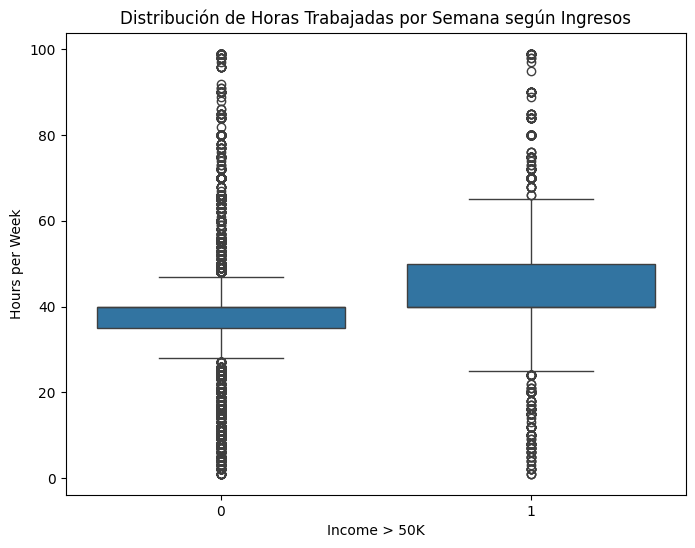

In [10]:
# Crear un boxplot de 'hours-per-week' respecto a 'income_>50K'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_train["income_>50K"], y=df_train["hours-per-week"])
plt.xlabel("Income > 50K")
plt.ylabel("Hours per Week")
plt.title("Distribución de Horas Trabajadas por Semana según Ingresos")


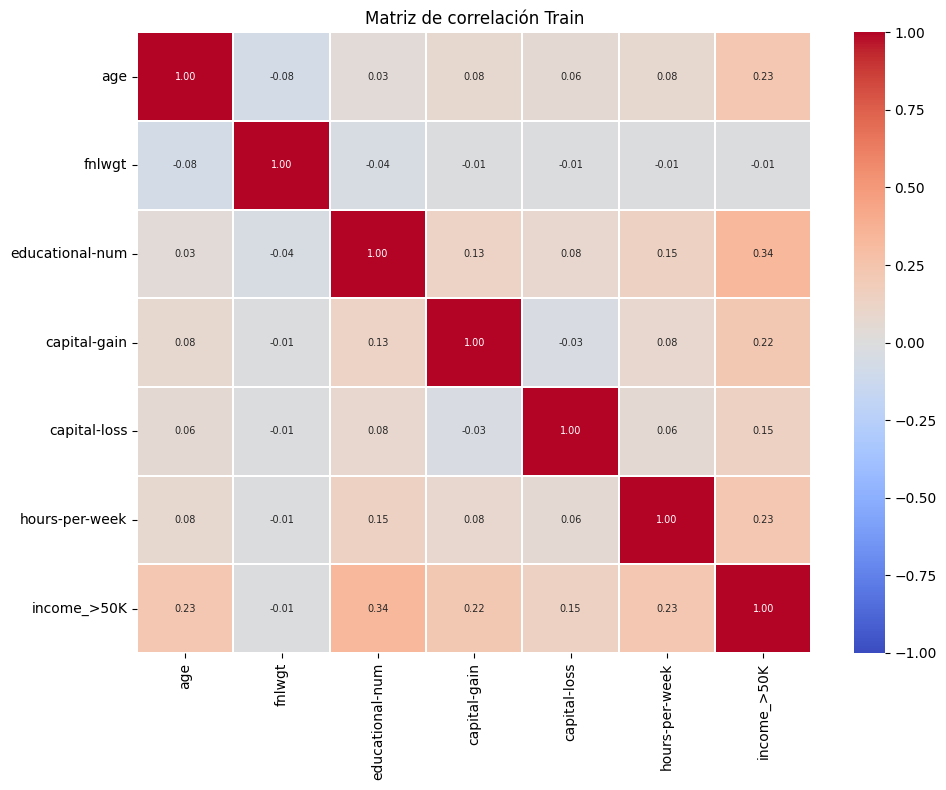

In [11]:
# Seleccionar solo las columnas numéricas
numeric_df = df_train.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Grafico
plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1,
            annot_kws={"size": 7}, fmt=".2f", linewidths=0.3)

plt.title('Matriz de correlación Train', fontsize=12)
plt.tight_layout()
plt.show()

### 3. Procesamiento inicial

In [12]:
# Eliminar valores NA de la variable de interes
df_train = df_train.dropna(subset=['income_>50K'])
df_test = df_test.dropna(subset=['income_>50K'])

In [13]:
# Ahora separamos los datos de entrada en X como variables explicativas y la variable a predecir Y en df_train
X_train, y_train = df_train.drop(['income_>50K'], axis=1), df_train['income_>50K']
display(X_train.head())
y_train.head()

age     workclass  fnlwgt     education  educational-num  \
6555    29       Private   46609          10th                6   
41256   19       Private  118352  Some-college               10   
27279   70           NaN  133248       HS-grad                9   
21788   51  Self-emp-inc  335902  Some-college               10   
39263   21     State-gov   39236  Some-college               10   

           marital-status      occupation   relationship   race  gender  \
6555        Never-married    Craft-repair  Not-in-family  Black    Male   
41256       Never-married   Other-service      Own-child  White  Female   
27279  Married-civ-spouse             NaN        Husband  White    Male   
21788  Married-civ-spouse    Craft-repair        Husband  White    Male   
39263       Never-married  Prof-specialty  Not-in-family  White  Female   

       capital-gain  capital-loss  hours-per-week native-country  
6555              0             0              40            NaN  
41256             0             0              16  United-States  
27279             0             0              14  United-States  
21788             0          1672              55  United-States  
39263             0             0               8  United-States

6555     0
41256    0
27279    0
21788    0
39263    0
Name: income_>50K, dtype: int64

In [14]:
# Ahora separamos los datos de entrada en X como variables explicativas y la variable a predecir Y en df_train
X_test, y_test = df_test.drop(['income_>50K'], axis=1), df_test['income_>50K']
display(X_test.head())
y_test.head()

age workclass  fnlwgt  education  educational-num      marital-status  \
22654   57   Private  159319    Masters               14  Married-civ-spouse   
21087   41   Private  252058  Bachelors               13       Never-married   
753     21   Private  215039    HS-grad                9       Never-married   
9532    27   Private  109611        9th                5  Married-civ-spouse   
14616   42   Private  201343    HS-grad                9  Married-civ-spouse   

              occupation   relationship   race  gender  capital-gain  \
22654    Exec-managerial        Husband  White    Male             0   
21087       Adm-clerical  Not-in-family  White    Male             0   
753         Craft-repair      Own-child  White    Male             0   
9532   Machine-op-inspct           Wife  White  Female             0   
14616       Craft-repair        Husband  White    Male          2885   

       capital-loss  hours-per-week native-country  
22654             0              50  United-States  
21087             0              40  United-States  
753               0              13            NaN  
9532              0              37       Portugal  
14616             0              40  United-States

22654    1
21087    0
753      0
9532     0
14616    0
Name: income_>50K, dtype: int64

In [15]:
X_train.isnull().sum()

age                   0
workclass          2006
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2013
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      617
dtype: int64

In [ ]:
X_test.isnull().sum()

age                  0
workclass          492
fnlwgt               0
education            0
educational-num      0
marital-status       0
occupation         493
relationship         0
race                 0
gender               0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     146
dtype: int64

In [16]:
# Convertir 'native-country' a binaria: 1 si es 'United-States', 0 si no
X_train['native-country'] = (X_train['native-country'] == 'United-States').astype(int)
X_test['native-country'] = (X_test['native-country'] == 'United-States').astype(int)

# Convertir 'gender' a binaria: 1 si es 'Male', 0 si es 'Female'
X_train['gender'] = (X_train['gender'] == 'Male').astype(int)
X_test['gender'] = (X_test['gender'] == 'Male').astype(int)

# Convertir 'workclass' a binaria: 1 si es 'Private', 0 si no
X_train['workclass'] = (X_train['workclass'] == 'Private').astype(int)
X_test['workclass'] = (X_test['workclass'] == 'Private').astype(int)

# Crear dummies para 'marital-status': Casado, Nunca Casado, Otros
X_train['marital-status_married'] = (X_train['marital-status'] == 'Married-civ-spouse').astype(int)
X_test['marital-status_married'] = (X_test['marital-status'] == 'Married-civ-spouse').astype(int)

X_train['marital-status_never-married'] = (X_train['marital-status'] == 'Never-married').astype(int)
X_test['marital-status_never-married'] = (X_test['marital-status'] == 'Never-married').astype(int)

X_train['marital-status_other'] = (~X_train['marital-status'].isin(['Married-civ-spouse', 'Never-married'])).astype(int)
X_test['marital-status_other'] = (~X_test['marital-status'].isin(['Married-civ-spouse', 'Never-married'])).astype(int)

# Crear dummies para 'occupation': Craft-repair, Prof-specialty, Exec-managerial, Adm-clerical, Sales, Otros
X_train['occupation_craft-repair'] = (X_train['occupation'] == 'Craft-repair').astype(int)
X_test['occupation_craft-repair'] = (X_test['occupation'] == 'Craft-repair').astype(int)

X_train['occupation_prof-specialty'] = (X_train['occupation'] == 'Prof-specialty').astype(int)
X_test['occupation_prof-specialty'] = (X_test['occupation'] == 'Prof-specialty').astype(int)

X_train['occupation_exec-managerial'] = (X_train['occupation'] == 'Exec-managerial').astype(int)
X_test['occupation_exec-managerial'] = (X_test['occupation'] == 'Exec-managerial').astype(int)

X_train['occupation_adm-clerical'] = (X_train['occupation'] == 'Adm-clerical').astype(int)
X_test['occupation_adm-clerical'] = (X_test['occupation'] == 'Adm-clerical').astype(int)

X_train['occupation_sales'] = (X_train['occupation'] == 'Sales').astype(int)
X_test['occupation_sales'] = (X_test['occupation'] == 'Sales').astype(int)

X_train['occupation_other'] = (~X_train['occupation'].isin(['Craft-repair', 'Prof-specialty', 'Exec-managerial', 'Adm-clerical', 'Sales'])).astype(int)
X_test['occupation_other'] = (~X_test['occupation'].isin(['Craft-repair', 'Prof-specialty', 'Exec-managerial', 'Adm-clerical', 'Sales'])).astype(int)

# Crear dummies para 'relationship': Husband, Not-in-family, Own-child, Unmarried, Wife
X_train['relationship_husband'] = (X_train['relationship'] == 'Husband').astype(int)
X_test['relationship_husband'] = (X_test['relationship'] == 'Husband').astype(int)

X_train['relationship_not-in-family'] = (X_train['relationship'] == 'Not-in-family').astype(int)
X_test['relationship_not-in-family'] = (X_test['relationship'] == 'Not-in-family').astype(int)

X_train['relationship_own-child'] = (X_train['relationship'] == 'Own-child').astype(int)
X_test['relationship_own-child'] = (X_test['relationship'] == 'Own-child').astype(int)

X_train['relationship_unmarried'] = (X_train['relationship'] == 'Unmarried').astype(int)
X_test['relationship_unmarried'] = (X_test['relationship'] == 'Unmarried').astype(int)

X_train['relationship_wife'] = (X_train['relationship'] == 'Wife').astype(int)
X_test['relationship_wife'] = (X_test['relationship'] == 'Wife').astype(int)

# Crear dummies para 'race': White, Black, Asian-Pac-Islander, Amer-Indian-Eskimo, Other
X_train['race_white'] = (X_train['race'] == 'White').astype(int)
X_test['race_white'] = (X_test['race'] == 'White').astype(int)

X_train['race_black'] = (X_train['race'] == 'Black').astype(int)
X_test['race_black'] = (X_test['race'] == 'Black').astype(int)

X_train['race_asian-pac-islander'] = (X_train['race'] == 'Asian-Pac-Islander').astype(int)
X_test['race_asian-pac-islander'] = (X_test['race'] == 'Asian-Pac-Islander').astype(int)

X_train['race_amer-indian-eskimo'] = (X_train['race'] == 'Amer-Indian-Eskimo').astype(int)
X_test['race_amer-indian-eskimo'] = (X_test['race'] == 'Amer-Indian-Eskimo').astype(int)

X_train['race_other'] = (X_train['race'] == 'Other').astype(int)
X_test['race_other'] = (X_test['race'] == 'Other').astype(int)

# Eliminar las columnas originales de las variables dummy
X_train = X_train.drop(['fnlwgt','education','capital-gain','capital-loss', 'marital-status', 'occupation', 'relationship', 'race'], axis=1)
X_test = X_test.drop(['fnlwgt','education','capital-gain','capital-loss', 'marital-status', 'occupation', 'relationship', 'race'], axis=1)

display(X_train.head())
display(X_test.head())
print(X_train.shape)
print(X_test.shape)

age  workclass  educational-num  gender  hours-per-week  \
6555    29          1                6       1              40   
41256   19          1               10       0              16   
27279   70          0                9       1              14   
21788   51          0               10       1              55   
39263   21          0               10       0               8   

       native-country  marital-status_married  marital-status_never-married  \
6555                0                       0                             1   
41256               1                       0                             1   
27279               1                       1                             0   
21788               1                       1                             0   
39263               1                       0                             1   

       marital-status_other  occupation_craft-repair  \
6555                      0                        1   
41256                     0                        0   
27279                     0                        0   
21788                     0                        1   
39263                     0                        0   

       occupation_prof-specialty  occupation_exec-managerial  \
6555                           0                           0   
41256                          0                           0   
27279                          0                           0   
21788                          0                           0   
39263                          1                           0   

       occupation_adm-clerical  occupation_sales  occupation_other  \
6555                         0                 0                 0   
41256                        0                 0                 1   
27279                        0                 0                 1   
21788                        0                 0                 0   
39263                        0                 0                 0   

       relationship_husband  relationship_not-in-family  \
6555                      0                           1   
41256                     0                           0   
27279                     1                           0   
21788                     1                           0   
39263                     0                           1   

       relationship_own-child  relationship_unmarried  relationship_wife  \
6555                        0                       0                  0   
41256                       1                       0                  0   
27279                       0                       0                  0   
21788                       0                       0                  0   
39263                       0                       0                  0   

       race_white  race_black  race_asian-pac-islander  \
6555            0           1                        0   
41256           1           0                        0   
27279           1           0                        0   
21788           1           0                        0   
39263           1           0                        0   

       race_amer-indian-eskimo  race_other  
6555                         0           0  
41256                        0           0  
27279                        0           0  
21788                        0           0  
39263                        0           0

age  workclass  educational-num  gender  hours-per-week  \
22654   57          1               14       1              50   
21087   41          1               13       1              40   
753     21          1                9       1              13   
9532    27          1                5       0              37   
14616   42          1                9       1              40   

       native-country  marital-status_married  marital-status_never-married  \
22654               1                       1                             0   
21087               1                       0                             1   
753                 0                       0                             1   
9532                0                       1                             0   
14616               1                       1                             0   

       marital-status_other  occupation_craft-repair  \
22654                     0                        0   
21087                     0                        0   
753                       0                        1   
9532                      0                        0   
14616                     0                        1   

       occupation_prof-specialty  occupation_exec-managerial  \
22654                          0                           1   
21087                          0                           0   
753                            0                           0   
9532                           0                           0   
14616                          0                           0   

       occupation_adm-clerical  occupation_sales  occupation_other  \
22654                        0                 0                 0   
21087                        1                 0                 0   
753                          0                 0                 0   
9532                         0                 0                 1   
14616                        0                 0                 0   

       relationship_husband  relationship_not-in-family  \
22654                     1                           0   
21087                     0                           1   
753                       0                           0   
9532                      0                           0   
14616                     1                           0   

       relationship_own-child  relationship_unmarried  relationship_wife  \
22654                       0                       0                  0   
21087                       0                       0                  0   
753                         1                       0                  0   
9532                        0                       0                  1   
14616                       0                       0                  0   

       race_white  race_black  race_asian-pac-islander  \
22654           1           0                        0   
21087           1           0                        0   
753             1           0                        0   
9532            1           0                        0   
14616           1           0                        0   

       race_amer-indian-eskimo  race_other  
22654                        0           0  
21087                        0           0  
753                          0           0  
9532                         0           0  
14616                        0           0

(35165, 25)
(8792, 25)


In [17]:
# Inicializar el escalador
scaler = StandardScaler()

# Ajustar y transformar el conjunto de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)
display(pd.DataFrame(X_train_scaled, columns=X_train.columns))

# Solo transformar el conjunto de prueba (sin ajustar nuevamente)
X_test_scaled = scaler.transform(X_test)
display(pd.DataFrame(X_test_scaled, columns=X_test.columns))

age  workclass  educational-num    gender  hours-per-week  \
0     -0.696646   0.662398        -1.578364  0.702783       -0.035379   
1     -1.425170   0.662398        -0.028104 -1.422915       -1.969193   
2      2.290302  -1.509667        -0.415669  0.702783       -2.130344   
3      0.906107  -1.509667        -0.028104  0.702783        1.173255   
4     -1.279466  -1.509667        -0.028104 -1.422915       -2.613798   
...         ...        ...              ...       ...             ...   
35160 -1.133761   0.662398        -0.028104  0.702783        2.220738   
35161 -0.769499   0.662398        -0.028104  0.702783       -0.035379   
35162 -0.769499   0.662398         0.747025 -1.422915       -0.035379   
35163 -1.570875   0.662398        -2.741058  0.702783        0.609226   
35164 -1.133761   0.662398        -0.803234  0.702783       -0.035379   

       native-country  marital-status_married  marital-status_never-married  \
0           -2.939307               -0.918903                      1.422092   
1            0.340216               -0.918903                      1.422092   
2            0.340216                1.088254                     -0.703189   
3            0.340216                1.088254                     -0.703189   
4            0.340216               -0.918903                      1.422092   
...               ...                     ...                           ...   
35160        0.340216                1.088254                     -0.703189   
35161       -2.939307                1.088254                     -0.703189   
35162        0.340216               -0.918903                     -0.703189   
35163       -2.939307               -0.918903                      1.422092   
35164        0.340216                1.088254                     -0.703189   

       marital-status_other  occupation_craft-repair  \
0                 -0.517628                 2.636718   
1                 -0.517628                -0.379259   
2                 -0.517628                -0.379259   
3                 -0.517628                 2.636718   
4                 -0.517628                -0.379259   
...                     ...                      ...   
35160             -0.517628                -0.379259   
35161             -0.517628                -0.379259   
35162              1.931891                -0.379259   
35163             -0.517628                -0.379259   
35164             -0.517628                -0.379259   

       occupation_prof-specialty  occupation_exec-managerial  \
0                      -0.379554                    -0.37872   
1                      -0.379554                    -0.37872   
2                      -0.379554                    -0.37872   
3                      -0.379554                    -0.37872   
4                       2.634674                    -0.37872   
...                          ...                         ...   
35160                  -0.379554                    -0.37872   
35161                  -0.379554                    -0.37872   
35162                   2.634674                    -0.37872   
35163                  -0.379554                    -0.37872   
35164                  -0.379554                    -0.37872   

       occupation_adm-clerical  occupation_sales  occupation_other  \
0                    -0.357348         -0.356741         -0.810993   
1                    -0.357348         -0.356741          1.233056   
2                    -0.357348         -0.356741          1.233056   
3                    -0.357348         -0.356741         -0.810993   
4                    -0.357348         -0.356741         -0.810993   
...                        ...               ...               ...   
35160                -0.357348          2.803156         -0.810993   
35161                -0.357348          2.803156         -0.810993   
35162                -0.357348         -0.356741         -0.810993   
35163                -0.357348         -0.35

age  workclass  educational-num    gender  hours-per-week  \
0     1.343221   0.662398         1.522155  0.702783        0.770377   
1     0.177583   0.662398         1.134590  0.702783       -0.035379   
2    -1.279466   0.662398        -0.415669  0.702783       -2.210920   
3    -0.842351   0.662398        -1.965928 -1.422915       -0.277105   
4     0.250435   0.662398        -0.415669  0.702783       -0.035379   
...        ...        ...              ...       ...             ...   
8787  0.104730  -1.509667        -0.415669  0.702783        0.770377   
8788 -1.352318  -1.509667        -0.028104  0.702783       -1.969193   
8789 -0.332384  -1.509667        -0.028104  0.702783       -0.035379   
8790  1.124664   0.662398        -0.028104  0.702783        0.770377   
8791  2.363155  -1.509667        -2.353493 -1.422915       -1.969193   

      native-country  marital-status_married  marital-status_never-married  \
0           0.340216                1.088254                     -0.703189   
1           0.340216               -0.918903                      1.422092   
2          -2.939307               -0.918903                      1.422092   
3          -2.939307                1.088254                     -0.703189   
4           0.340216                1.088254                     -0.703189   
...              ...                     ...                           ...   
8787        0.340216                1.088254                     -0.703189   
8788        0.340216               -0.918903                      1.422092   
8789        0.340216                1.088254                     -0.703189   
8790        0.340216                1.088254                     -0.703189   
8791       -2.939307               -0.918903                     -0.703189   

      marital-status_other  occupation_craft-repair  \
0                -0.517628                -0.379259   
1                -0.517628                -0.379259   
2                -0.517628                 2.636718   
3                -0.517628                -0.379259   
4                -0.517628                 2.636718   
...                    ...                      ...   
8787             -0.517628                -0.379259   
8788             -0.517628                -0.379259   
8789             -0.517628                 2.636718   
8790             -0.517628                -0.379259   
8791              1.931891                -0.379259   

      occupation_prof-specialty  occupation_exec-managerial  \
0                     -0.379554                    2.640476   
1                     -0.379554                   -0.378720   
2                     -0.379554                   -0.378720   
3                     -0.379554                   -0.378720   
4                     -0.379554                   -0.378720   
...                         ...                         ...   
8787                  -0.379554                   -0.378720   
8788                  -0.379554                   -0.378720   
8789                  -0.379554                   -0.378720   
8790                   2.634674                   -0.378720   
8791                  -0.379554                   -0.378720   

      occupation_adm-clerical  occupation_sales  occupation_other  \
0                   -0.357348         -0.356741         -0.810993   
1                    2.798391         -0.356741         -0.810993   
2                   -0.357348         -0.356741         -0.810993   
3                   -0.357348         -0.356741          1.233056   
4                   -0.357348         -0.356741         -0.810993   
...                       ...               ...               ...   
8787                -0.357348          2.803156         -0.810993   
8788                -0.357348         -0.356741          1.233056   
8789                -0.357348         -0.356741         -0.810993   
8790                -0.357348         -0.356741         -0.810993   
8791                -0.357348   

## Modelos

#### Clasificación

In [18]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [19]:
# Función para entrenar y evaluar modelos de clasificación
def train_and_evaluate_classification(models, param_grids, X_train, y_train, X_test, y_test, scoring='accuracy'):
    results = {}
    best_estimators = {}

    for name, model in models.items():
        print(f"Entrenando {name}...")

        # Búsqueda de hiperparámetros con GridSearchCV
        grid_search = GridSearchCV(model, param_grids[name], cv=3, scoring=scoring, n_jobs=-1)
        grid_search.fit(X_train, y_train)

        # Mejor modelo encontrado
        best_model = grid_search.best_estimator_
        best_estimators[name] = best_model

        # Predicciones en train y test
        y_train_pred = best_model.predict(X_train)
        y_test_pred = best_model.predict(X_test)

        # Evaluar métricas
        accuracy = accuracy_score(y_test, y_test_pred)
        precision = precision_score(y_test, y_test_pred, average='weighted')
        recall = recall_score(y_test, y_test_pred, average='weighted')
        f1 = f1_score(y_test, y_test_pred, average='weighted')

        results[name] = {
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1,
            "Best Params": grid_search.best_params_
        }

        print(f"\n🔹 Mejor estimador para {name}:{best_model}")
        print(f"🔹 Mejores hiperparámetros: {grid_search.best_params_}\n")

        # Matriz de confusión en Train y Test
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        cm_train = confusion_matrix(y_train, y_train_pred)
        cm_test = confusion_matrix(y_test, y_test_pred)

        disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
        disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)

        axes[0].set_title(f"{name} - Train Set")
        disp_train.plot(ax=axes[0], cmap='Blues', values_format='d')

        axes[1].set_title(f"{name} - Test Set")
        disp_test.plot(ax=axes[1], cmap='Blues', values_format='d')

        print()
        plt.show()
        print()

    return results, best_estimators

In [20]:
# Definir modelos de clasificación
classification_models = {
    "SVC": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Ridge Logit": LogisticRegression(penalty='l2', solver='liblinear'),
    "Lasso Logit": LogisticRegression(penalty='l1', solver='liblinear'),
    "Random Forest": RandomForestClassifier(random_state=SEED),
}

In [21]:
# Definir hiperparámetros para GridSearchCV
classification_param_grids = {
    "SVC": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]},
    "Decision Tree": {"max_depth": [None, 10, 20], "min_samples_split": [2, 5, 10],"criterion": ["gini","entropy"]},
    "Ridge Logit": {"C": [0.01, 0.1, 1, 10],"fit_intercept":[True,False]},
    "Lasso Logit": {"C": [0.01, 0.1, 1, 10],"fit_intercept":[True,False]},
    "Random Forest": {"n_estimators": [50, 100], "max_depth": [None, 10], "criterion": ["gini","entropy"]}
}

Entrenando SVC...

🔹 Mejor estimador para SVC:SVC(C=10)
🔹 Mejores hiperparámetros: {'C': 10, 'kernel': 'rbf'}




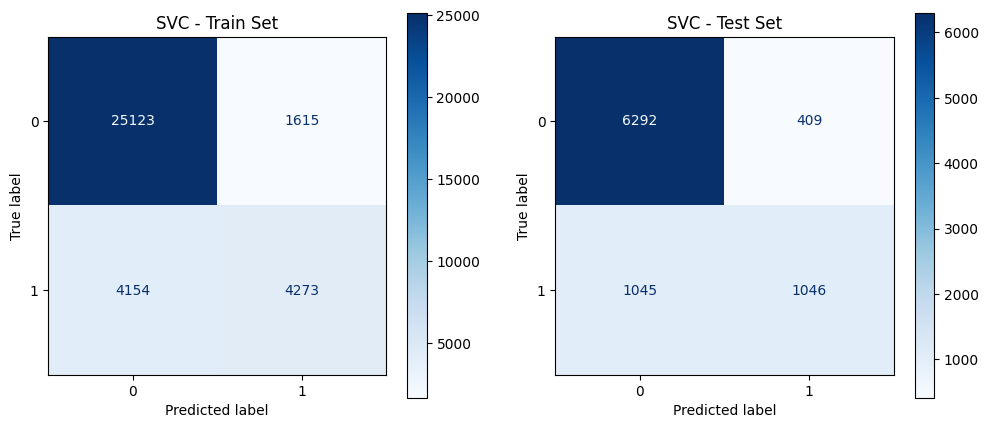


Entrenando Decision Tree...

🔹 Mejor estimador para Decision Tree:DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=10)
🔹 Mejores hiperparámetros: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10}




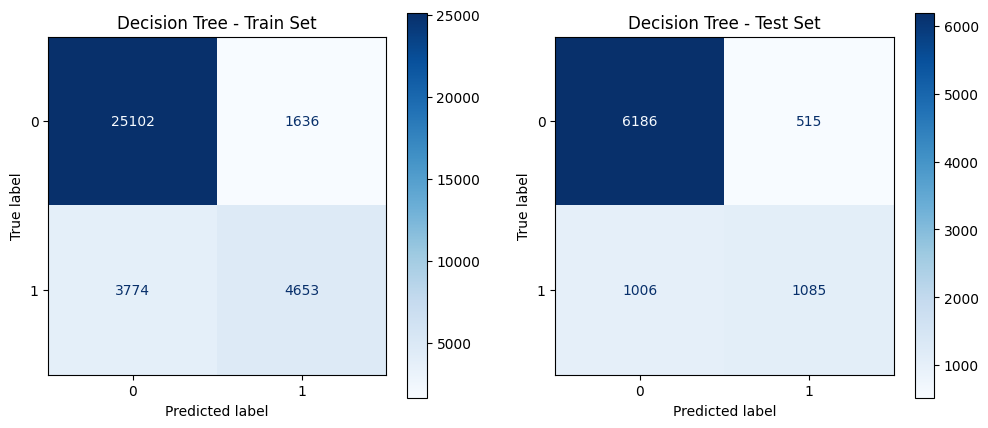


Entrenando Ridge Logit...

🔹 Mejor estimador para Ridge Logit:LogisticRegression(C=0.1, solver='liblinear')
🔹 Mejores hiperparámetros: {'C': 0.1, 'fit_intercept': True}




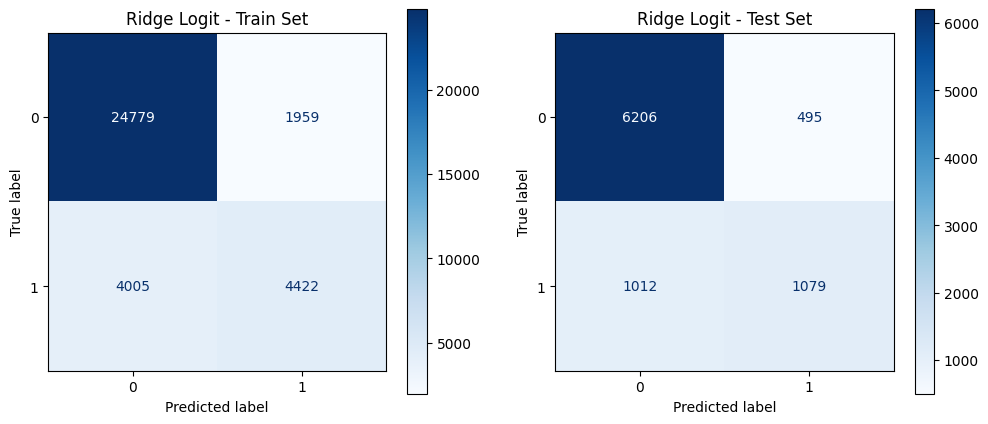


Entrenando Lasso Logit...

🔹 Mejor estimador para Lasso Logit:LogisticRegression(C=0.1, fit_intercept=False, penalty='l1', solver='liblinear')
🔹 Mejores hiperparámetros: {'C': 0.1, 'fit_intercept': False}




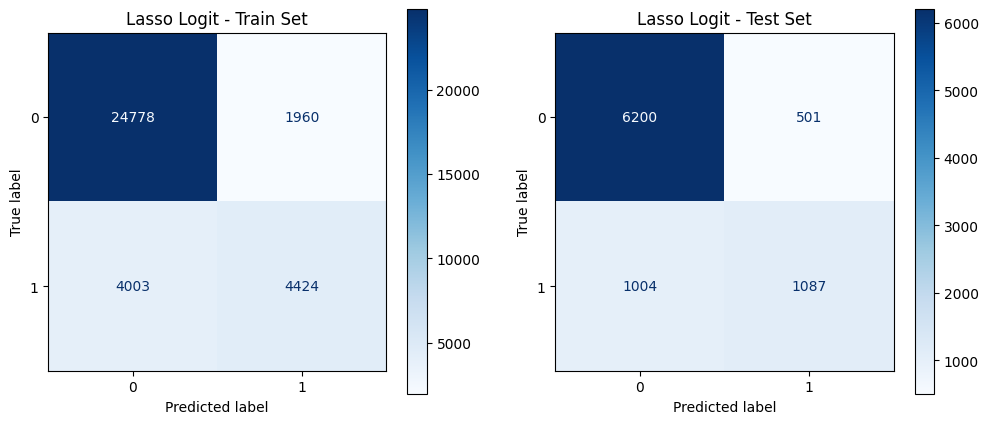


Entrenando Random Forest...

🔹 Mejor estimador para Random Forest:RandomForestClassifier(criterion='entropy', max_depth=10, random_state=2025)
🔹 Mejores hiperparámetros: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 100}




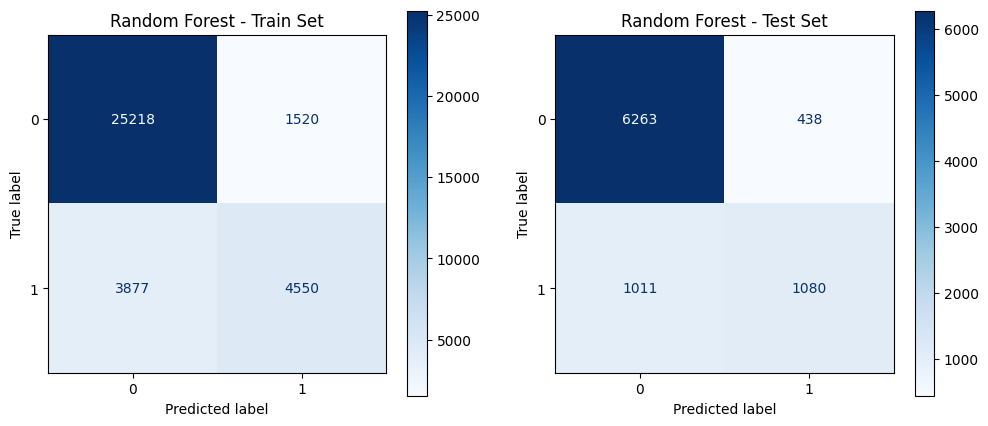

In [22]:
# Ejecutar entrenamiento y evaluación
classification_results, classification_best_estimators = train_and_evaluate_classification(
    classification_models, classification_param_grids,
    X_train, y_train, X_test, y_test, scoring='accuracy'
)

In [23]:
# Convertir resultados a DataFrame y mostrar
classification_results_df = pd.DataFrame(classification_results).T
classification_results_df

Accuracy Precision    Recall  F1-Score  \
SVC            0.834622  0.824591  0.834622  0.823538   
Decision Tree  0.827002  0.816838  0.827002  0.818552   
Ridge Logit    0.828594  0.818346  0.828594  0.819688   
Lasso Logit    0.828822  0.818745  0.828822  0.820216   
Random Forest  0.835191  0.825445  0.835191  0.825486   

                                                     Best Params  
SVC                                   {'C': 10, 'kernel': 'rbf'}  
Decision Tree  {'criterion': 'entropy', 'max_depth': 10, 'min...  
Ridge Logit                    {'C': 0.1, 'fit_intercept': True}  
Lasso Logit                   {'C': 0.1, 'fit_intercept': False}  
Random Forest  {'criterion': 'entropy', 'max_depth': 10, 'n_e...

<Figure size 1000x600 with 0 Axes>

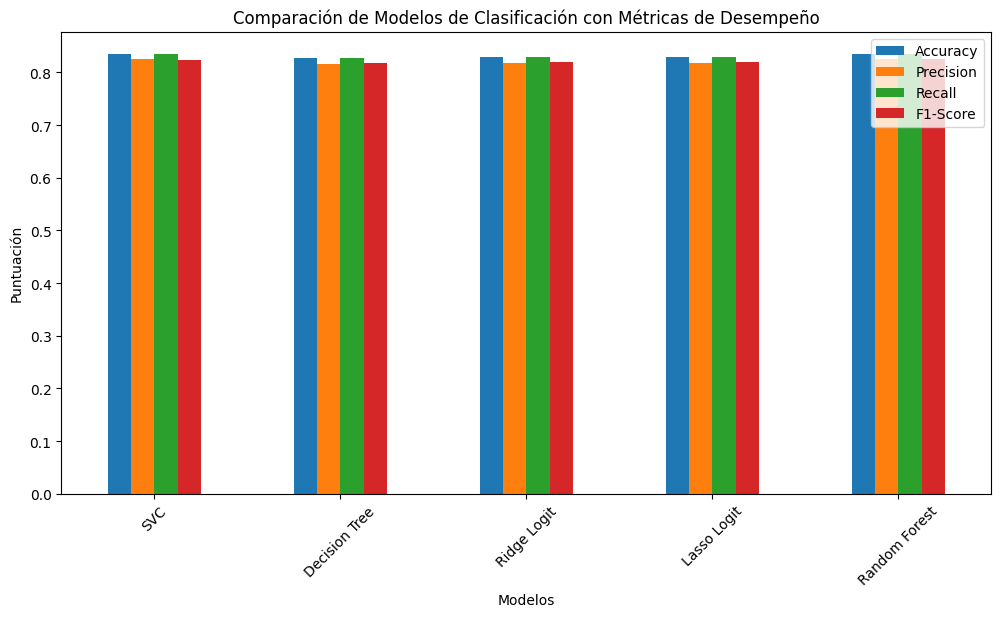

In [24]:
# Graficar resultados
plt.figure(figsize=(10, 6))
classification_results_df[['Accuracy', 'Precision', 'Recall', 'F1-Score']].plot(kind='bar', figsize=(12,6))
plt.title("Comparación de Modelos de Clasificación con Métricas de Desempeño")
plt.xlabel("Modelos")
plt.ylabel("Puntuación")
plt.xticks(rotation=45)
plt.legend(loc="upper right")
plt.show()

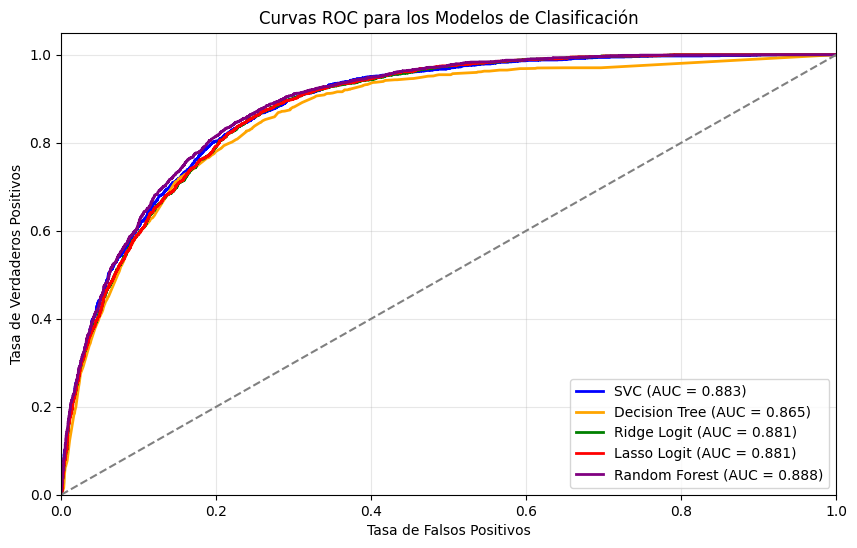

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

def plot_roc_curves(models, X_test, y_test):
    """
    Visualiza las curvas ROC para los modelos de clasificación seleccionados.
    """
    plt.figure(figsize=(10, 6))
    colors = ['blue', 'orange', 'green', 'red', 'purple']

    for (name, model), color in zip(models.items(), colors):
        try:
            # Obtener probabilidades de predicción
            if hasattr(model, "predict_proba"):
                probs = model.predict_proba(X_test)[:, 1]  # Probabilidad de clase positiva
            elif hasattr(model, "decision_function"):  # Para SVC
                probs = model.decision_function(X_test)
            else:
                raise ValueError(f"El modelo {name} no soporta predicciones probabilísticas.")

            # Calcular curva ROC y AUC
            fpr, tpr, _ = roc_curve(y_test, probs)
            auc = roc_auc_score(y_test, probs)

            # Graficar curva ROC
            plt.plot(fpr, tpr, color=color, lw=2, label=f'{name} (AUC = {auc:.3f})')
        except Exception as e:
            print(f"Error al crear curva ROC para {name}: {str(e)}")

    # Línea diagonal de referencia
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Curvas ROC para los Modelos de Clasificación')
    plt.legend(loc="lower right")
    plt.grid(True, alpha=0.3)
    plt.show()

# Llamar a la función con los mejores modelos
top_models = classification_best_estimators  # Modelos optimizados con GridSearchCV
plot_roc_curves(top_models, X_test, y_test)

## Evaluación con Curvas ROC y AUC**

Los valores de AUC obtenidos son los siguientes:

| Modelo            | AUC  |
|------------------|------|
| **Random Forest** | **0.888** |
| **SVC**          | **0.883** |
| **Ridge Logit**  | **0.881** |
| **Lasso Logit**  | **0.881** |
| **Decision Tree** | **0.865** |

- El modelo con mejor AUC es Random Forest (0.888), seguido de SVC (0.883).
- Decision Tree tiene el peor desempeño con 0.865.

=== Análisis de Entropía para Modelos de Clasificación ===

Entropía media para SVC: -inf

Entropía media para Decision Tree: 0.3167

Entropía media para Ridge Logit: 0.3719

Entropía media para Lasso Logit: 0.3695

Entropía media para Random Forest: 0.3709


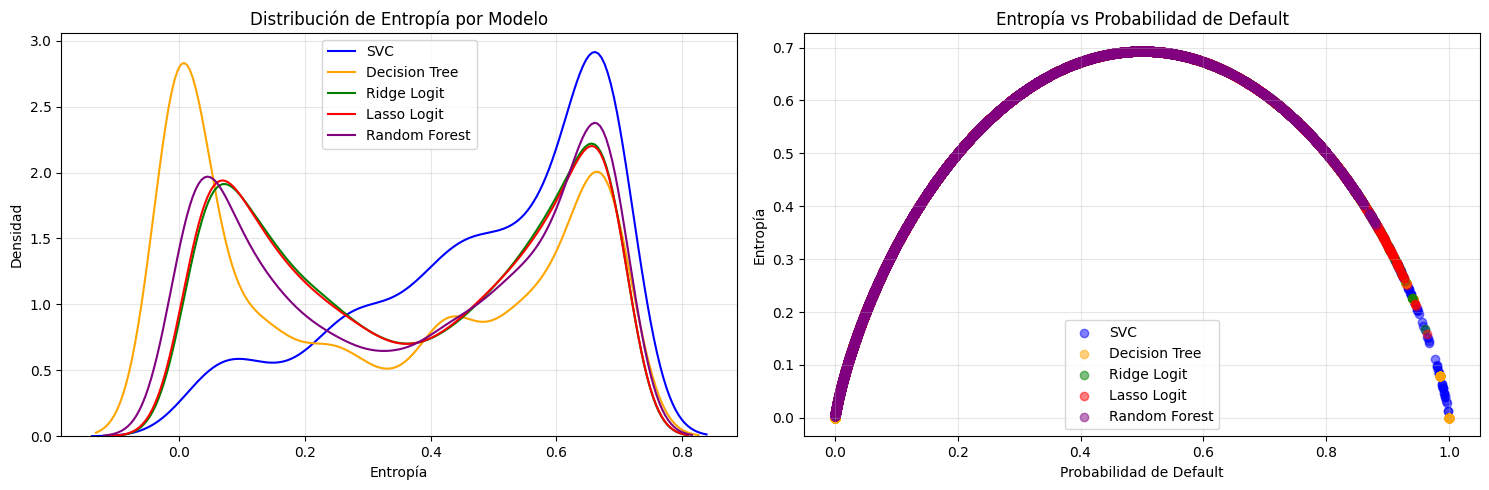


Entropía media por clase real:

SVC:
Clase 0 (No Default): -inf
Clase 1 (Default): -inf

Decision Tree:
Clase 0 (No Default): 0.2524
Clase 1 (Default): 0.5227

Ridge Logit:
Clase 0 (No Default): 0.3098
Clase 1 (Default): 0.5710

Lasso Logit:
Clase 0 (No Default): 0.3071
Clase 1 (Default): 0.5696

Random Forest:
Clase 0 (No Default): 0.3046
Clase 1 (Default): 0.5831


In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy

def calculate_entropy(probabilities):
    """
    Calcula la entropía de las predicciones para clasificación binaria.
    """
    p = np.vstack([1 - probabilities, probabilities]).T
    return entropy(p, axis=1)

def analyze_entropy(y_true, models, X_test):
    """
    Analiza y visualiza la entropía de las predicciones de los modelos de clasificación.
    """
    entropy_dict = {}
    mean_entropy_dict = {}

    if not models:
        print("No hay modelos para analizar la entropía.")
        return

    probabilities = {}
    for name, model in models.items():
        try:
            if hasattr(model, "predict_proba"):
                probs = model.predict_proba(X_test)[:, 1]
            elif hasattr(model, "decision_function"):
                probs = model.decision_function(X_test)
            else:
                raise ValueError(f"El modelo {name} no soporta predicciones probabilísticas.")

            probabilities[name] = probs
            entropy_vals = calculate_entropy(probs)
            entropy_dict[name] = entropy_vals
            mean_entropy_dict[name] = np.mean(entropy_vals)
            print(f"\nEntropía media para {name}: {mean_entropy_dict[name]:.4f}")
        except Exception as e:
            print(f"Error calculando entropía para {name}: {str(e)}")
            continue

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    colors = ['blue', 'orange', 'green', 'red', 'purple']
    for (name, entropy_vals), color in zip(entropy_dict.items(), colors):
        sns.kdeplot(data=entropy_vals, label=name, ax=ax1, color=color)
    ax1.set_title('Distribución de Entropía por Modelo')
    ax1.set_xlabel('Entropía')
    ax1.set_ylabel('Densidad')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    for (name, entropy_vals), color in zip(entropy_dict.items(), colors):
        ax2.scatter(probabilities[name], entropy_vals, alpha=0.5, label=name, color=color)
    ax2.set_title('Entropía vs Probabilidad de Default')
    ax2.set_xlabel('Probabilidad de Default')
    ax2.set_ylabel('Entropía')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    print("\nEntropía media por clase real:")
    for name, entropy_vals in entropy_dict.items():
        print(f"\n{name}:")
        for clase in [0, 1]:
            mask = y_true == clase
            mean_entropy = np.mean(entropy_vals[mask])
            print(f"Clase {clase} ({'No Default' if clase == 0 else 'Default'}): {mean_entropy:.4f}")

print("=== Análisis de Entropía para Modelos de Clasificación ===")
analyze_entropy(y_test, classification_best_estimators, X_test)

## **Evaluación con Entropía**

La entropía indica la confianza del modelo en sus predicciones. Valores bajos sugieren mayor confianza, mientras que valores altos reflejan mayor incertidumbre.

### **Entropía Media General**

| Modelo            | Entropía Media |
|------------------|---------------|
| **SVC**          | **-inf (error)** |
| **Decision Tree** | **0.3167** |
| **Ridge Logit**  | **0.3719** |
| **Lasso Logit**  | **0.3695** |
| **Random Forest**| **0.3709** |

- SVC presenta un error en el cálculo de entropía (-inf), lo que indica problemas con su implementación.
- Decision Tree tiene la menor entropía (0.3167), lo que indica confianza en sus predicciones, pero su AUC es el más bajo.
- Los modelos Ridge Logit, Lasso Logit y Random Forest tienen entropías similares (~0.37), lo que sugiere estabilidad.

### **Entropía por Clase Real**

| Modelo            | No Default (Clase 0) | Default (Clase 1) |
|------------------|--------------------|------------------|
| **SVC**          | **-inf**             | **-inf**         |
| **Decision Tree** | **0.2524**           | **0.5227**       |
| **Ridge Logit**  | **0.3098**           | **0.5710**       |
| **Lasso Logit**  | **0.3071**           | **0.5696**       |
| **Random Forest**| **0.3046**           | **0.5831**       |

- Todos los modelos presentan mayor entropía en la clase Default (1), lo que sugiere mayor incertidumbre al predecir esta clase.
- Decision Tree tiene la menor entropía en ambas clases, pero su AUC es el más bajo, lo que sugiere sobreajuste.
- Random Forest muestra la mayor entropía en la clase Default (0.5831), lo que indica que este modelo es más incierto en esas predicciones.


## **¿Cuál es el Mejor Modelo?**

**Random Forest es el modelo con mejor desempeño general.**

- **Mayor AUC (0.888)** → Mejor capacidad de clasificación.
- **Entropía moderada (~0.37)** → No es excesivamente incierto en sus predicciones.
- **Mayor entropía en Default (0.5831)** → Puede mejorar en la clase minoritaria.

**Decision Tree tiene menor entropía pero peor AUC.**

Puede ser demasiado confiado en sus predicciones, lo que sugiere sobreajuste.

**Ridge Logit y Lasso Logit son opciones intermedias.**
- AUC alto (~0.881) y entropía equilibrada.
- Podrían ser preferidos si se quiere un modelo más interpretable.
